In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from pprint import pprint
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [19]:
print("QUESTION 1")
df = pd.read_csv('zoo_data.csv')
X = df.iloc[:,1:-1]
Y = df["class_type"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

scores = cross_val_score(gnb, X, Y, scoring='accuracy',cv=cv,n_jobs=-1)

print("Accuracy: ",mean(absolute(scores)))

QUESTION 1
Accuracy:  0.93


In [20]:
print("QUESTION 2:")

X = df.iloc[:,1:-1]
Y = df["class_type"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

dt = DecisionTreeClassifier(criterion="gini",random_state=42, max_depth=3)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

scores = cross_val_score(dt, X, Y, scoring='accuracy',cv=cv,n_jobs=-1)

print("Accuracy: ",mean(absolute(scores)))



QUESTION 2:
Accuracy:  0.755


In [21]:
print("QUESTION 3:")

X = df.iloc[:,1:-1]
Y = df["class_type"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points: %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

QUESTION 3:
Number of mislabeled points out of a total 13 points: 1


QUESTION 4


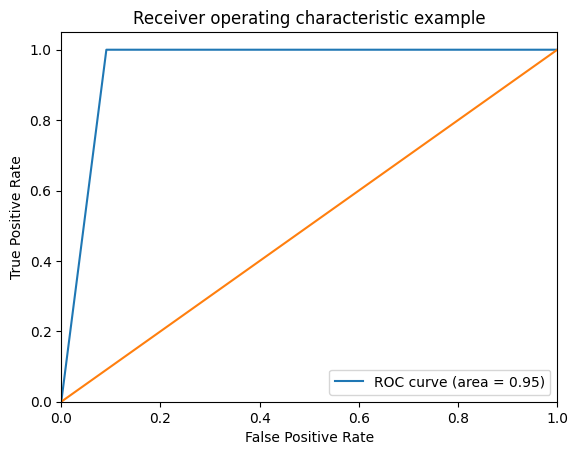

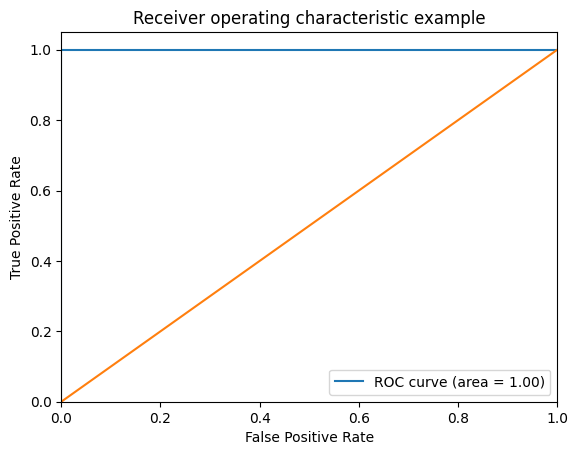

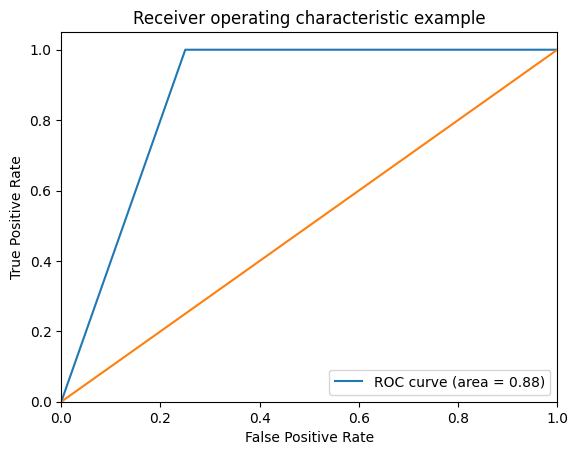

In [22]:
print("QUESTION 4")
X = df.iloc[:,1:-1]
Y = df["class_type"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

y = label_binarize(Y, classes=[3,6,7])
n_classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

clf = OneVsRestClassifier(GaussianNB())
y_score = clf.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()